In [1071]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [1072]:
ds = pd.read_csv('Data RSL.csv')

In [1073]:
ds

,GOV,Level of government,TAX,Revenue category,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2004,2004,LSL,Loti,6,Millions,NaN,NaN,4001.294,NaN,NaN
1,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2005,2005,LSL,Loti,6,Millions,NaN,NaN,4437.224,NaN,NaN
2,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2006,2006,LSL,Loti,6,Millions,NaN,NaN,6344.029,NaN,NaN
3,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2007,2007,LSL,Loti,6,Millions,NaN,NaN,6775.955,NaN,NaN
4,FED,Federal or Central government,TOTAL,Total tax and non-tax revenue,2008,2008,LSL,Loti,6,Millions,NaN,NaN,8280.234,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2017,2017,LSL,Loti,6,Millions,NaN,NaN,-631.698,NaN,NaN
1724,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2018,2018,LSL,Loti,6,Millions,NaN,NaN,-681.585,NaN,NaN
1725,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2019,2019,LSL,Loti,6,Millions,NaN,NaN,-866.652,NaN,NaN
1726,NES,Total,5111_L02_02_LSO,VAT - Domestic (Refunds),2020,2020,LSL,Loti,6,Millions,NaN,NaN,-722.489,NaN,NaN


In [1074]:
# dropping unwanted columns

In [1075]:
ds.drop(columns=['GOV','Level of government','TAX','YEA','Unit Code','Unit','PowerCode Code','Reference Period Code','Reference Period','Flag Codes','Flags'], inplace=True)

In [1076]:
ds

,Revenue category,Year,PowerCode,Value
0,Total tax and non-tax revenue,2004,Millions,4001.294
1,Total tax and non-tax revenue,2005,Millions,4437.224
2,Total tax and non-tax revenue,2006,Millions,6344.029
3,Total tax and non-tax revenue,2007,Millions,6775.955
4,Total tax and non-tax revenue,2008,Millions,8280.234
...,...,...,...,...
1723,VAT - Domestic (Refunds),2017,Millions,-631.698
1724,VAT - Domestic (Refunds),2018,Millions,-681.585
1725,VAT - Domestic (Refunds),2019,Millions,-866.652
1726,VAT - Domestic (Refunds),2020,Millions,-722.489


In [1077]:
# Set all values in the 'PowerCode Code' column to 6000000
ds['PowerCode Code'] = 6000000

In [1078]:

duplicates = ds.duplicated(subset=['Revenue category', 'Year', 'PowerCode Code', 'Value'], keep=False)
duplicate_rows = ds[duplicates]

print(duplicate_rows)

                   Revenue category  Year PowerCode     Value  PowerCode Code
0     Total tax and non-tax revenue  2004  Millions  4001.294         6000000
1     Total tax and non-tax revenue  2005  Millions  4437.224         6000000
2     Total tax and non-tax revenue  2006  Millions  6344.029         6000000
3     Total tax and non-tax revenue  2007  Millions  6775.955         6000000
4     Total tax and non-tax revenue  2008  Millions  8280.234         6000000
...                             ...   ...       ...       ...             ...
1723       VAT - Domestic (Refunds)  2017  Millions  -631.698         6000000
1724       VAT - Domestic (Refunds)  2018  Millions  -681.585         6000000
1725       VAT - Domestic (Refunds)  2019  Millions  -866.652         6000000
1726       VAT - Domestic (Refunds)  2020  Millions  -722.489         6000000
1727       VAT - Domestic (Refunds)  2021  Millions  -860.203         6000000

[1728 rows x 5 columns]


In [1079]:
df = ds.copy()

In [1080]:
df.drop_duplicates(subset=['Revenue category', 'Year', 'PowerCode Code', 'Value'], inplace=True)

In [1081]:
df.shape

(864, 5)

In [1082]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1687    False
1688    False
1689    False
1690    False
1691    False
Length: 864, dtype: bool

In [1083]:
df

,Revenue category,Year,PowerCode,Value,PowerCode Code
0,Total tax and non-tax revenue,2004,Millions,4001.294,6000000
1,Total tax and non-tax revenue,2005,Millions,4437.224,6000000
2,Total tax and non-tax revenue,2006,Millions,6344.029,6000000
3,Total tax and non-tax revenue,2007,Millions,6775.955,6000000
4,Total tax and non-tax revenue,2008,Millions,8280.234,6000000
...,...,...,...,...,...
1687,VAT - Domestic (Refunds),2017,Millions,-631.698,6000000
1688,VAT - Domestic (Refunds),2018,Millions,-681.585,6000000
1689,VAT - Domestic (Refunds),2019,Millions,-866.652,6000000
1690,VAT - Domestic (Refunds),2020,Millions,-722.489,6000000


In [1084]:
df.describe()

,Year,Value,PowerCode Code
count,864.000000,864.000000,864.0
mean,2012.500000,1650.746302,6000000.0
std,5.191132,2941.268014,0.0
min,2004.000000,-866.652000,6000000.0
25%,2008.000000,0.000000,6000000.0
50%,2012.500000,464.790000,6000000.0
75%,2017.000000,1857.219000,6000000.0
max,2021.000000,19131.238000,6000000.0


In [1085]:
# Define the year range
start_year = 2004
end_year = 2021

# Filter the data within the specified years
df_filtered_years = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]

# Group by 'Revenue category' and check if all 'Value' entries are zero
zero_value_categories = df_filtered_years.groupby('Revenue category')['Value'].sum()
zero_value_categories = zero_value_categories[zero_value_categories == 0].index

# Filter out rows where 'Revenue category' is in zero_value_categories
df_filtered = df[~df['Revenue category'].isin(zero_value_categories)]

# Save the filtered data to a new CSV file
df_filtered.to_csv('filtered_data.csv', index=False)

# Print the filtered dataframe
print(df_filtered)

                   Revenue category  Year PowerCode     Value  PowerCode Code
0     Total tax and non-tax revenue  2004  Millions  4001.294         6000000
1     Total tax and non-tax revenue  2005  Millions  4437.224         6000000
2     Total tax and non-tax revenue  2006  Millions  6344.029         6000000
3     Total tax and non-tax revenue  2007  Millions  6775.955         6000000
4     Total tax and non-tax revenue  2008  Millions  8280.234         6000000
...                             ...   ...       ...       ...             ...
1687       VAT - Domestic (Refunds)  2017  Millions  -631.698         6000000
1688       VAT - Domestic (Refunds)  2018  Millions  -681.585         6000000
1689       VAT - Domestic (Refunds)  2019  Millions  -866.652         6000000
1690       VAT - Domestic (Refunds)  2020  Millions  -722.489         6000000
1691       VAT - Domestic (Refunds)  2021  Millions  -860.203         6000000

[666 rows x 5 columns]


In [1086]:
df=df_filtered

In [1087]:
df[df['Revenue category'] == 'Gambling levy']

,Revenue category,Year,PowerCode,Value,PowerCode Code
396,Gambling levy,2004,Millions,0.000,6000000
397,Gambling levy,2005,Millions,0.000,6000000
398,Gambling levy,2006,Millions,0.000,6000000
399,Gambling levy,2007,Millions,0.000,6000000
400,Gambling levy,2008,Millions,0.000,6000000
401,Gambling levy,2009,Millions,0.000,6000000
402,Gambling levy,2010,Millions,0.000,6000000
403,Gambling levy,2011,Millions,0.000,6000000
404,Gambling levy,2012,Millions,0.000,6000000
405,Gambling levy,2013,Millions,6.895,6000000


In [1088]:
df

,Revenue category,Year,PowerCode,Value,PowerCode Code
0,Total tax and non-tax revenue,2004,Millions,4001.294,6000000
1,Total tax and non-tax revenue,2005,Millions,4437.224,6000000
2,Total tax and non-tax revenue,2006,Millions,6344.029,6000000
3,Total tax and non-tax revenue,2007,Millions,6775.955,6000000
4,Total tax and non-tax revenue,2008,Millions,8280.234,6000000
...,...,...,...,...,...
1687,VAT - Domestic (Refunds),2017,Millions,-631.698,6000000
1688,VAT - Domestic (Refunds),2018,Millions,-681.585,6000000
1689,VAT - Domestic (Refunds),2019,Millions,-866.652,6000000
1690,VAT - Domestic (Refunds),2020,Millions,-722.489,6000000


In [1089]:
# Function to replace zero values with the mean of the Revenue category
def replace_zeros_with_mean(df):
    # Get the unique Revenue categories
    revenue_categories = df['Revenue category'].unique()
    
    for category in revenue_categories:
        # Get the subset of the dataframe for the current category
        category_df = df[df['Revenue category'] == category]
        
        # Calculate the mean value, excluding zero values
        mean_value = category_df[category_df['Value'] != 0]['Value'].mean()
        
        # Replace zero values with the mean value in the original dataframe
        df.loc[(df['Revenue category'] == category) & (df['Value'] == 0), 'Value'] = mean_value
    
    return df

# Apply the function
df_replaced = replace_zeros_with_mean(df)

# Ensure the columns are in the correct order (if necessary)
df_replaced = df_replaced[['Revenue category', 'Year', 'PowerCode Code', 'Value']]

df_replaced.to_csv('processed_data.csv', index=False)

print(df_replaced)

                   Revenue category  Year  PowerCode Code     Value
0     Total tax and non-tax revenue  2004         6000000  4001.294
1     Total tax and non-tax revenue  2005         6000000  4437.224
2     Total tax and non-tax revenue  2006         6000000  6344.029
3     Total tax and non-tax revenue  2007         6000000  6775.955
4     Total tax and non-tax revenue  2008         6000000  8280.234
...                             ...   ...             ...       ...
1687       VAT - Domestic (Refunds)  2017         6000000  -631.698
1688       VAT - Domestic (Refunds)  2018         6000000  -681.585
1689       VAT - Domestic (Refunds)  2019         6000000  -866.652
1690       VAT - Domestic (Refunds)  2020         6000000  -722.489
1691       VAT - Domestic (Refunds)  2021         6000000  -860.203

[666 rows x 4 columns]


In [1090]:
df=df_replaced

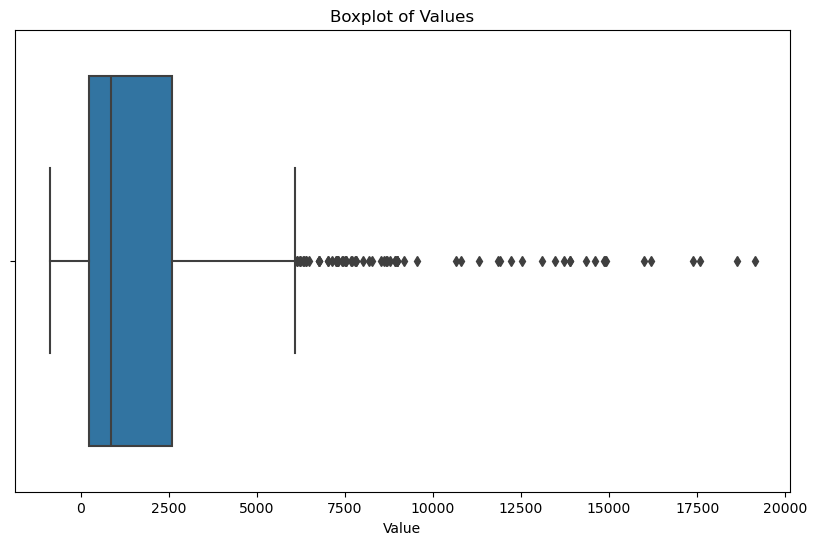

In [1091]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Value'])
plt.title('Boxplot of Values')
plt.xlabel('Value')
plt.show()

In [1092]:
# Calculate Q1, Q3, and IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Value'] < lower_limit) | (df['Value'] > upper_limit)]
print('Lower limit:', lower_limit)
print('Upper limit:', upper_limit)
print('Outliers detected using IQR:')
print(outliers)


Lower limit: -3295.152125
Upper limit: 6144.340875
Outliers detected using IQR:
                                    Revenue category  Year  PowerCode Code  \
2                      Total tax and non-tax revenue  2006         6000000   
3                      Total tax and non-tax revenue  2007         6000000   
4                      Total tax and non-tax revenue  2008         6000000   
5                      Total tax and non-tax revenue  2009         6000000   
6                      Total tax and non-tax revenue  2010         6000000   
...                                              ...   ...             ...   
1561  Total tax and non-tax revenue excluding grants  2017         6000000   
1562  Total tax and non-tax revenue excluding grants  2018         6000000   
1563  Total tax and non-tax revenue excluding grants  2019         6000000   
1564  Total tax and non-tax revenue excluding grants  2020         6000000   
1565  Total tax and non-tax revenue excluding grants  2021    

In [1093]:
# Cap outliers
df = df[(df['Value'] >= lower_limit) & (df['Value'] <= upper_limit)]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


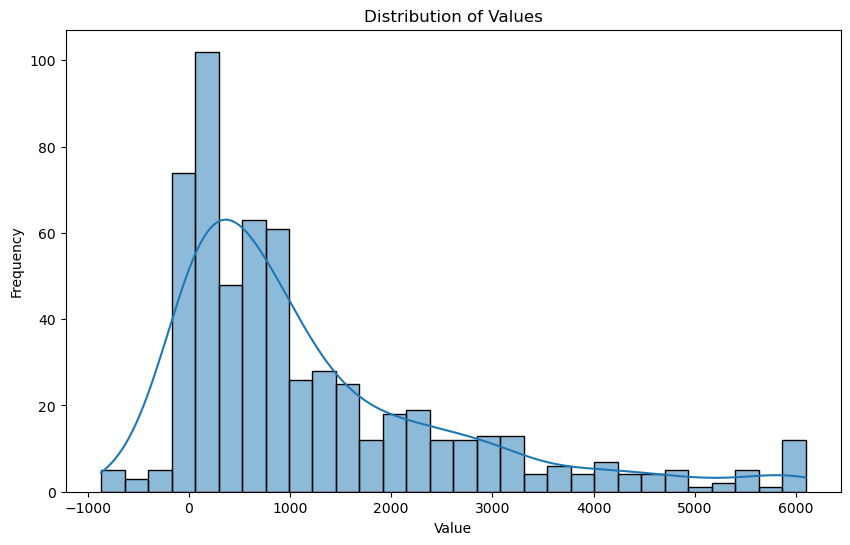

In [1094]:
# Visualize the distribution of the 'Value' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], bins=30, kde=True)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

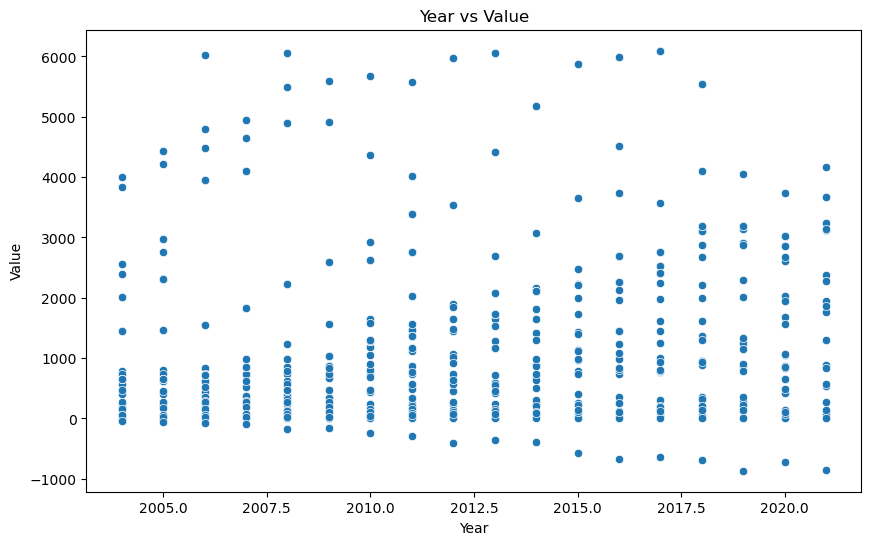

In [1095]:
#to visualize year vs value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Value', data=df)
plt.title('Year vs Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

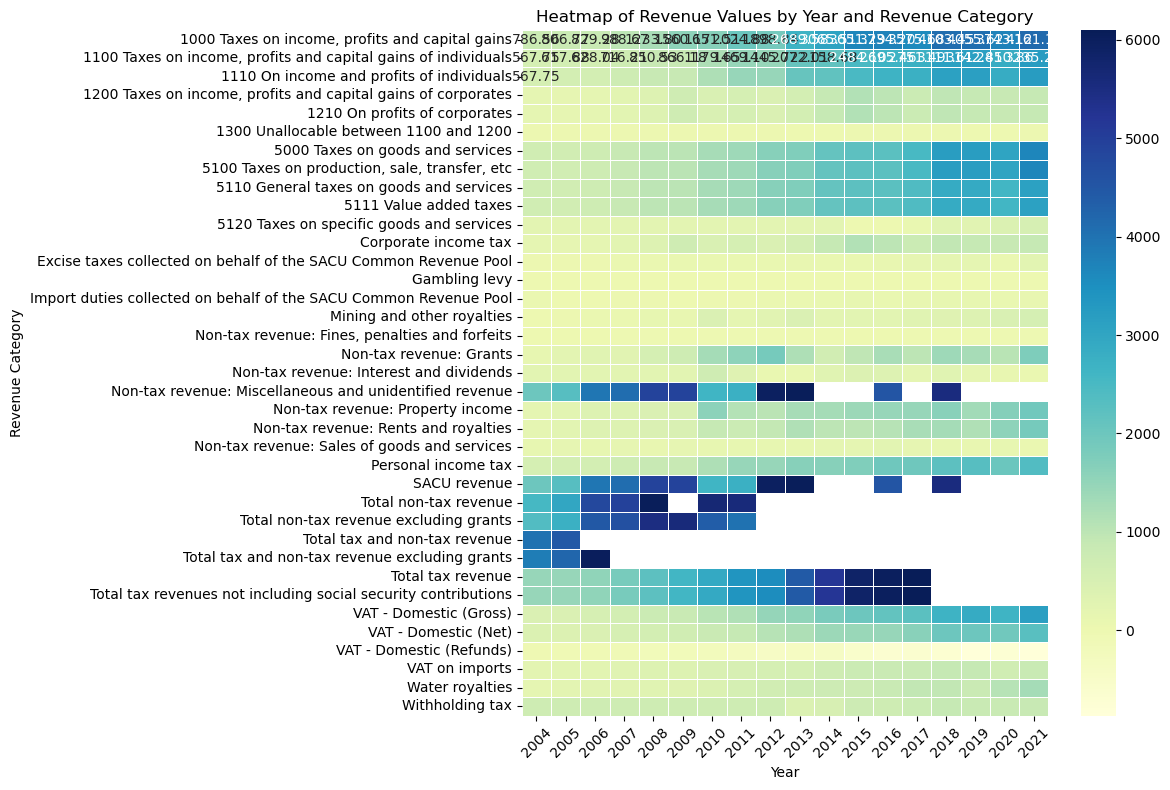

In [1096]:
# Create the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the dataset to create a heatmap
heatmap_data = df.pivot_table(index='Revenue category', columns='Year', values='Value')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Revenue Values by Year and Revenue Category')
plt.xlabel('Year')
plt.ylabel('Revenue Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


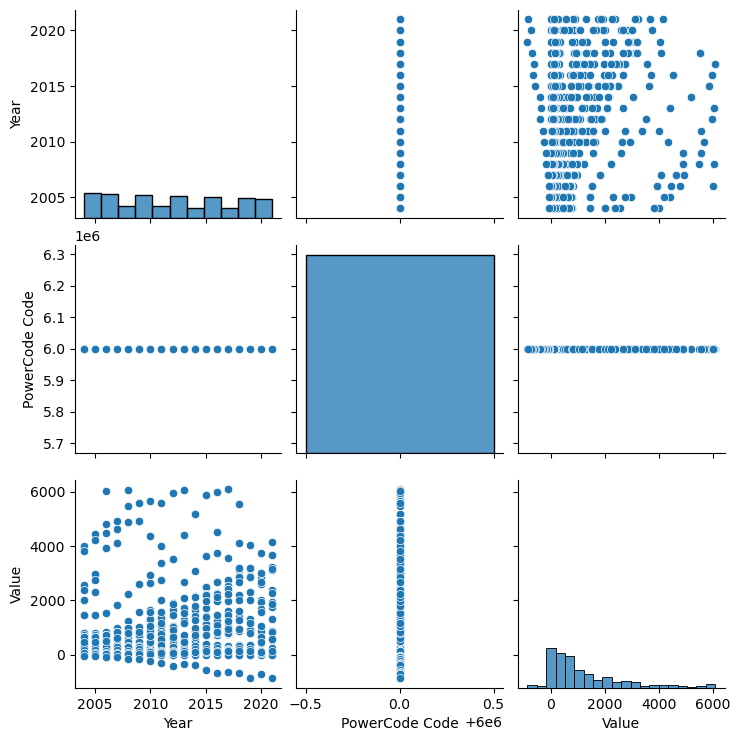

In [1097]:
numeric_df = df.select_dtypes(include='number')
#to visualize relationships between numerical variables
sns.pairplot(numeric_df)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


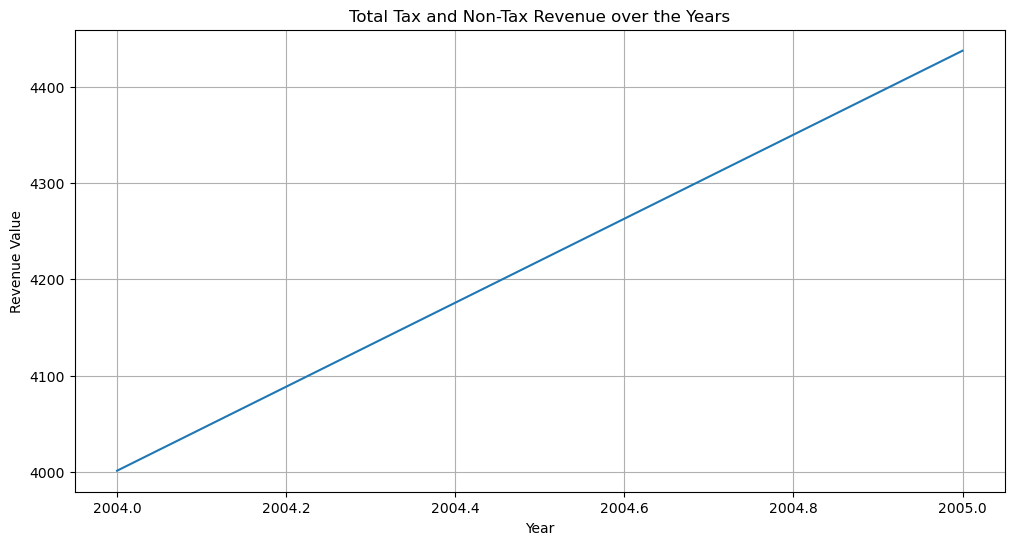

In [1098]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['Revenue category'] == 'Total tax and non-tax revenue'], x='Year', y='Value')
plt.title('Total Tax and Non-Tax Revenue over the Years')
plt.xlabel('Year')
plt.ylabel('Revenue Value')
plt.grid(True)
plt.show()

In [1099]:
from sklearn.linear_model import Ridge


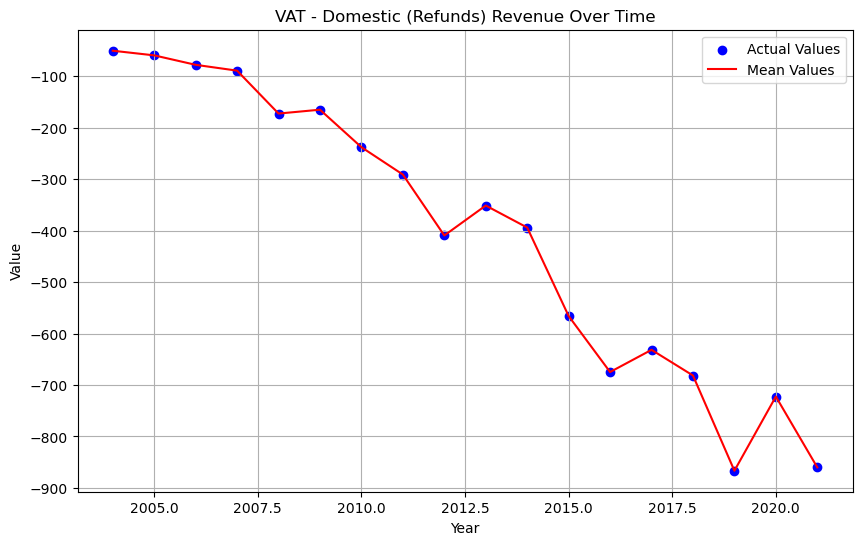

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


--------------------------------------------
Predicted value for 2004 in VAT - Domestic (Refunds): 23.275320853688754
--------------------------------------------
Mean Absolute Error on Test Set: 52.87168402965654
--------------------------------------------
Mean Squared Error on Test Set: 4082.0895941288363
--------------------------------------------
R-squared Score on Test Set: 0.9310996233550785
--------------------------------------------


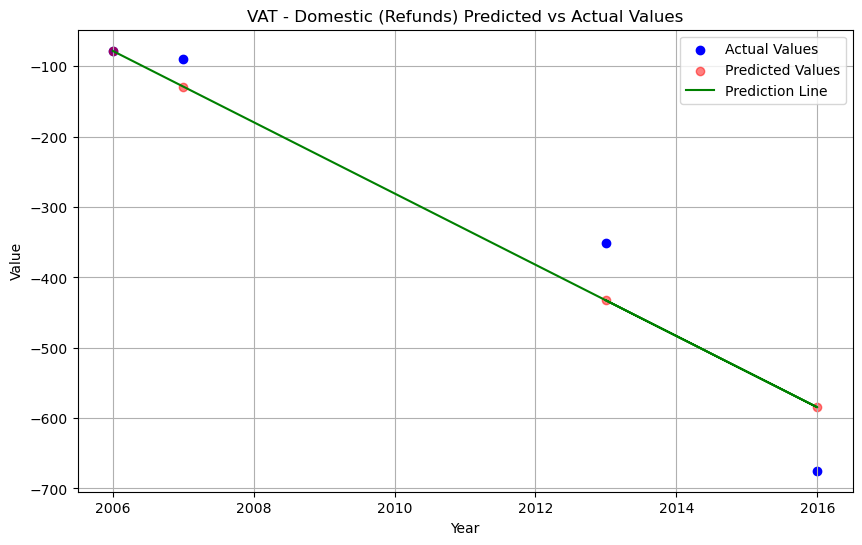

In [1122]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("processed_data.csv")
category_data = data[data["Revenue category"] == revenue_category]
if category_data.empty:
    print("No data available for the specified revenue category. Please choose another category.")
else:
    mean_values = category_data.groupby("Year")["Value"].mean().reset_index()
    mean_values.columns = ["Year", "Mean_Value"]
    category_data = pd.merge(category_data, mean_values, on="Year", how="left")

    # we are showing historical data
    plt.figure(figsize=(10, 6))
    plt.scatter(category_data["Year"], category_data["Value"], color="blue", label="Actual Values")
    plt.plot(mean_values["Year"], mean_values["Mean_Value"], color="red", label="Mean Values")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.title(f"{revenue_category} Revenue Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Selecting features (X) and target variable (y)
    X = category_data[["Year", "Revenue category"]]
    y = category_data["Value"]

    # One-hot encode the 'Revenue category' column
    encoder = OneHotEncoder(sparse=False)
    X_encoded = encoder.fit_transform(X[["Revenue category"]])
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(["Revenue category"]))

    # Combining the encoded revenue category and year column
    X_final = pd.concat([X[["Year"]].reset_index(drop=True), X_encoded_df], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=70)

    # uisng linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict values for the test set
    y_pred_test = model.predict(X_test)

    # Evaluate the model on the test set
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    # Prompt user to input revenue category
    revenue_category = 'VAT - Domestic (Refunds)'
    # Predict value for the specified year
    coming_year = 2004

    # Encoding the input revenue category...
    input_data = pd.DataFrame([[coming_year, revenue_category]], columns=["Year", "Revenue category"])
    input_encoded = encoder.transform(input_data[["Revenue category"]])
    input_encoded_df = pd.DataFrame(input_encoded, columns=encoder.get_feature_names_out(["Revenue category"]))
    input_final = pd.concat([input_data[["Year"]].reset_index(drop=True), input_encoded_df], axis=1)

    predicted_value = model.predict(input_final)

    print(f"Predicted value for {coming_year} in {revenue_category}: {predicted_value[0]}")
    print("Mean Absolute Error on Testing Set:", mae)
    print("Mean Squared Error on Testing Set:", mse)
    print("R-squared Score on Testing Set:", r2)

    # Visualize the predicted vs actual values on the test set
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test["Year"], y_test, color="blue", label="Actual Values")
    plt.scatter(X_test["Year"], y_pred_test, color="red", label="Predicted Values", alpha=0.5)
    plt.plot(X_test["Year"], y_pred_test, color="green", label="Prediction Line")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.title(f"{revenue_category} Predicted vs Actual Values")
    plt.legend()
    plt.grid(True)
    plt.show()


In [1123]:
import joblib as joblib
joblib.dump(model,'tax_predictor.pkl')

['tax_predictor.pkl']